# Which city would you like to live?

*** City Fynders Group: Xiangyu Zhang, Wendan Yan, Yiran Zhang, Zhuochen Han***

In [15]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Read data

In [3]:
natural = pd.read_csv('../data/Natural.csv')

### Natural data analysis

In [4]:
natural.head()

,City,State,Jan_T,April_T,july_T,Oct_T,Prep_inch,Prep_days,Snowfall_inch,Green_score,Air,Water,Toxics,Hazardous,Sanitation
0,Atlanta,GA,42.7,61.6,80.0,62.8,50.20,115.0,2.1,43.36,15,26,4,11,39.0
1,Austin,TX,50.2,68.3,84.2,70.6,33.65,85.0,0.9,55.68,44,9,48,50,NaN
2,Baltimore,MD,32.3,53.2,76.5,55.4,41.94,115.0,21.5,50.81,16,33,14,24,41.0
3,Birmingham,AL,42.6,61.3,80.2,62.9,53.99,117.0,1.5,44.45,8,20,8,28,33.0
4,Boston,MA,29.3,48.3,73.9,54.1,42.53,127.0,42.8,61.37,29,7,39,5,11.0


In [20]:
coeff = np.corrcoef(natural['Jan_T'], natural['Snowfall_inch'])
coeff

array([[ nan,  nan],
       [ nan,  nan]])

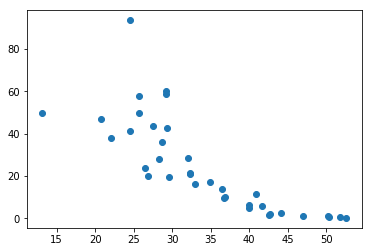

In [19]:
plt.scatter(natural['Jan_T'], natural['Snowfall_inch'])

In [26]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.geocode('Chicago')
loc

Location(Chicago, Cook County, Illinois, United States of America, (41.8755546, -87.6244212, 0.0))

/Users/han/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/han/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



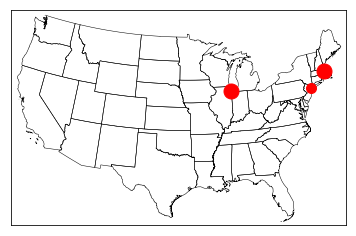

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

cities = [["Chicago",10],
          ["Boston",10],
          ["New York",5],
          ["San Francisco",25]]
scale = 5

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

In [31]:
import mpl_toolkits.Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.Basemap'

In [41]:
import plotly
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-bubble-map-populations' )

/Users/han/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `d3-bubble-map-populations` didn't end with .html. Adding .html to the end of your file.



'file:///Users/han/Google Drive/CSE583/Project/uwseds-group-city-fynders/Docs/d3-bubble-map-populations.html'